<a href="https://colab.research.google.com/github/gracerslee/Missing-Value-Imputation-/blob/main/colab/missing_value_imputation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step-by-step implementation:

#### 1. Generate a complete data frame and a data frame with missing values

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate a complete DataFrame (1000 rows, 10 columns)
complete_df = pd.DataFrame(np.random.randn(1000, 10), columns=[f'col_{i}' for i in range(1, 11)])

# Introduce missing values randomly (second DataFrame)
missing_df = complete_df.copy()
missingness_prop = 0.1  # 10% missing values
missing_mask = np.random.rand(*missing_df.shape) < missingness_prop
missing_df[missing_mask] = np.nan

In [ ]:
complete_df

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040
...,...,...,...,...,...,...,...,...,...,...
995,0.867805,0.227405,-0.889845,-0.960780,0.254128,0.697051,0.391881,-1.034598,0.650668,0.425911
996,-1.070666,-0.784321,0.688496,-0.234508,1.589147,0.501129,-0.486631,-0.010206,0.063383,-0.728390
997,-0.912588,0.701390,0.845273,0.603781,1.515318,-0.541773,1.674271,-0.900921,-1.012686,-1.759959
998,-0.445795,-0.503722,0.525937,0.243891,-1.192973,-0.392726,-0.371462,-1.775982,-0.980947,-0.770814


In [ ]:
missing_df

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10
0,0.496714,-0.138264,NaN,NaN,-0.234153,NaN,1.579213,0.767435,-0.469474,0.542560
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,NaN,-1.763040
...,...,...,...,...,...,...,...,...,...,...
995,0.867805,0.227405,-0.889845,-0.960780,0.254128,NaN,NaN,-1.034598,0.650668,0.425911
996,-1.070666,NaN,0.688496,-0.234508,1.589147,0.501129,-0.486631,-0.010206,0.063383,-0.728390
997,-0.912588,0.701390,0.845273,0.603781,1.515318,NaN,1.674271,NaN,-1.012686,-1.759959
998,-0.445795,-0.503722,NaN,0.243891,-1.192973,-0.392726,-0.371462,NaN,-0.980947,-0.770814


####2. Generate a density plot for missing values

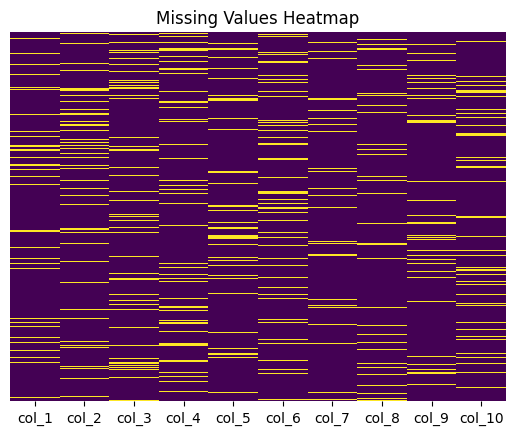

In [ ]:
# Visualize missing data with a density plot
sns.heatmap(missing_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

###3. Perform imputation using various algorithms
Here are the required algorithms for imputation:

1. Mean Imputation
2. Median Imputation
3. Frequent Value Imputation
4. Zero Imputation
5. Constant Imputation (e.g., a value of your choice)
6. K-NN Imputation
7. MICE (Multivariate Imputation by Chained Equation)
8. DNN Imputation
9. Stochastic Regression Imputation
10. Hot-Deck Imputation

In [ ]:
!pip install scikit-learn fancyimpute tensorflow

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.0 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=e613f228004f819971f126efd864c134532a10b5e61ac72837d1091ed968748a
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=afde537397835fff46e54173bac11f7c706c93902ff653a44b32461031caf11b
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


###Then, implement the imputation methods:

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import IterativeImputer  # For MICE

# Imputation functions
def mean_imputation(df):
    imputer = SimpleImputer(strategy='mean')
    return pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

def median_imputation(df):
    imputer = SimpleImputer(strategy='median')
    return pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

def most_frequent_imputation(df):
    imputer = SimpleImputer(strategy='most_frequent')
    return pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

def zero_imputation(df):
    imputer = SimpleImputer(strategy='constant', fill_value=0)
    return pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

def constant_imputation(df, fill_value):
    imputer = SimpleImputer(strategy='constant', fill_value=fill_value)
    return pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

def knn_imputation(df, n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    return pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

def mice_imputation(df):
    imputer = IterativeImputer()
    return pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# You can implement DNN Imputation using TensorFlow, or skip if it's too complex for your use case.


### 4. Compare and evaluate the performance of algorithms
For comparison, you can compute the Root Mean Square Error (RMSE) between the imputed data and the original data:

In [ ]:
from sklearn.metrics import mean_squared_error

def evaluate_imputation(original_df, imputed_df):
    # Only compare non-missing values to the original data
    mask = original_df.notna()
    mse = mean_squared_error(original_df[mask], imputed_df[mask])
    return np.sqrt(mse)

# Apply all imputation methods and evaluate them
methods = {
    'Mean Imputation': mean_imputation,
    'Median Imputation': median_imputation,
    'Most Frequent Value Imputation': most_frequent_imputation,
    'Zero Imputation': zero_imputation,
    'Constant Imputation (e.g., -1)': lambda df: constant_imputation(df, -1),
    'K-NN Imputation': knn_imputation,
    'MICE Imputation': mice_imputation,
}

results = {}
for method_name, imputation_func in methods.items():
    imputed_df = imputation_func(missing_df)
    rmse = evaluate_imputation(complete_df, imputed_df)
    results[method_name] = rmse

# Find the method with the best performance (lowest RMSE)
best_method = min(results, key=results.get)

print(f"Best imputation method: {best_method} with RMSE: {results[best_method]}")

Best imputation method: Median Imputation with RMSE: 0.32043709182414126


### 5. Visualize the results
You can plot the RMSE scores of each method using a bar plot:

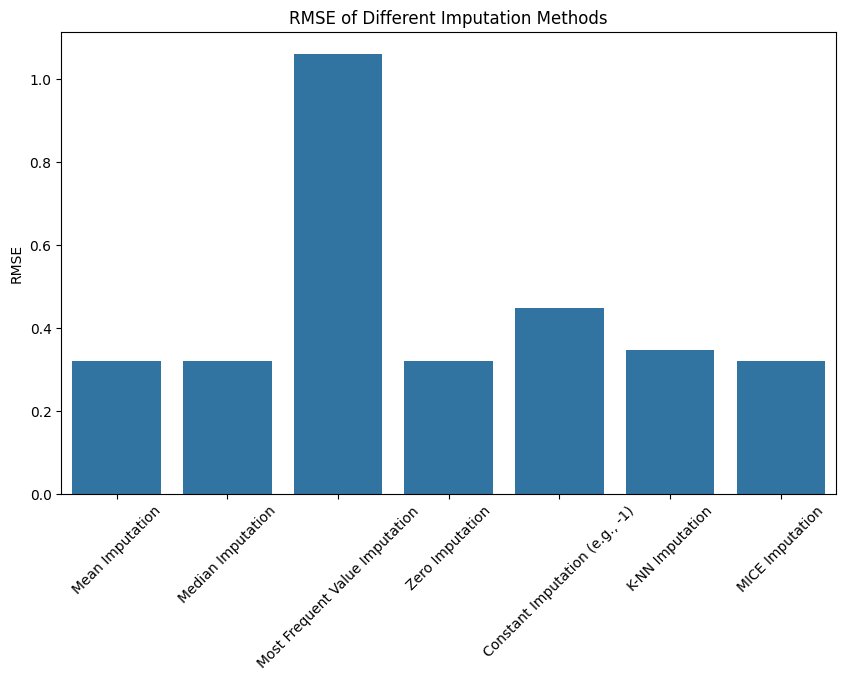

In [ ]:
# Visualize RMSE comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('RMSE of Different Imputation Methods')
plt.xticks(rotation=45)
plt.ylabel('RMSE')
plt.show()

### 6. Export the imputed data
After identifying the best method, you can export the imputed DataFrame:

In [ ]:
best_imputed_df = methods[best_method](missing_df)

# Export the best imputed DataFrame to a CSV file
best_imputed_df.to_csv('best_imputed_data.csv', index=False)
print("Best imputed data exported to 'best_imputed_data.csv'.")

Best imputed data exported to 'best_imputed_data.csv'.


### 7. Wrap everything in a single function
You can combine all these steps into a single function that performs the imputation, evaluation, and export.

In [ ]:
def impute_and_evaluate(df, complete_df):
    # Visualize missing values
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()

    # Dictionary of imputation methods
    methods = {
        'Mean Imputation': mean_imputation,
        'Median Imputation': median_imputation,
        'Most Frequent Value Imputation': most_frequent_imputation,
        'Zero Imputation': zero_imputation,
        'Constant Imputation (-1)': lambda df: constant_imputation(df, -1),
        'K-NN Imputation': knn_imputation,
        'MICE Imputation': mice_imputation,
    }

    # Evaluate methods
    results = {}
    for method_name, imputation_func in methods.items():
        imputed_df = imputation_func(df)
        rmse = evaluate_imputation(complete_df, imputed_df)
        results[method_name] = rmse

    # Find the best method
    best_method = min(results, key=results.get)
    print(f"Best imputation method: {best_method} with RMSE: {results[best_method]}")

    # Plot RMSE
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(results.keys()), y=list(results.values()))
    plt.title('RMSE of Different Imputation Methods')
    plt.xticks(rotation=45)
    plt.ylabel('RMSE')
    plt.show()

    # Export the best imputed data
    best_imputed_df = methods[best_method](df)
    best_imputed_df.to_csv('best_imputed_data.csv', index=False)
    print("Best imputed data exported to 'best_imputed_data.csv'.")

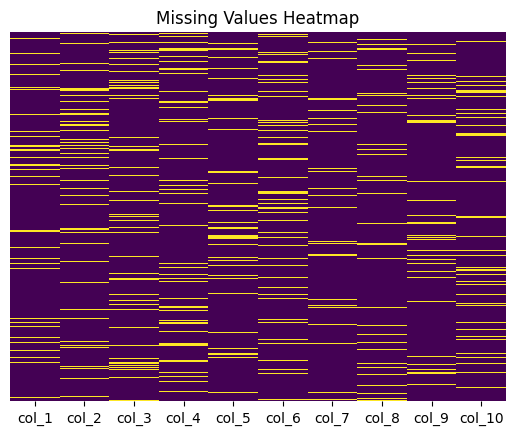

Best imputation method: Median Imputation with RMSE: 0.32043709182414126


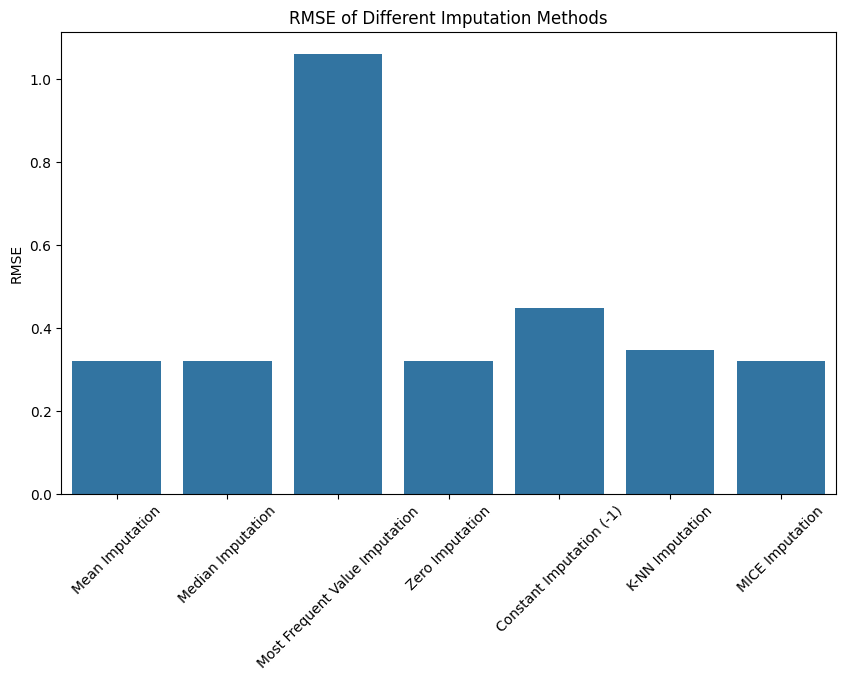

Best imputed data exported to 'best_imputed_data.csv'.


In [ ]:
impute_and_evaluate(missing_df, complete_df)

### Notes:
1. DNN Imputation: This is complex and not commonly used for basic missing data imputation. I recommend skipping this unless you have a specific model in mind.
2. Hot-Deck Imputation: This can be implemented based on similar rows; a custom method might be needed.

## Only use imcomplete dataframe

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import IterativeImputer  # MICE imputation

# Function to perform imputation, evaluate performance, and export results
def impute_and_evaluate(df):
    # Visualize missing values
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()

    # Imputation methods
    def mean_imputation(df):
        imputer = SimpleImputer(strategy='mean')
        return pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    def median_imputation(df):
        imputer = SimpleImputer(strategy='median')
        return pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    def most_frequent_imputation(df):
        imputer = SimpleImputer(strategy='most_frequent')
        return pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    def zero_imputation(df):
        imputer = SimpleImputer(strategy='constant', fill_value=0)
        return pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    def constant_imputation(df, fill_value):
        imputer = SimpleImputer(strategy='constant', fill_value=fill_value)
        return pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    def knn_imputation(df, n_neighbors=5):
        imputer = KNNImputer(n_neighbors=n_neighbors)
        return pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    def mice_imputation(df):
        imputer = IterativeImputer()
        return pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    # List of imputation methods to evaluate
    methods = {
        'Mean Imputation': mean_imputation,
        'Median Imputation': median_imputation,
        'Most Frequent Value Imputation': most_frequent_imputation,
        'Zero Imputation': zero_imputation,
        'Constant Imputation (e.g., -1)': lambda df: constant_imputation(df, -1),
        'K-NN Imputation': knn_imputation,
        'MICE Imputation': mice_imputation,
    }

    # Function to evaluate imputation based on variance consistency
    def evaluate_imputation(original_df, imputed_df):
        original_variance = original_df.var()
        imputed_variance = imputed_df.var()
        return np.abs(original_variance - imputed_variance).mean()

    # Evaluate imputation methods
    results = {}
    for method_name, imputation_func in methods.items():
        imputed_df = imputation_func(df)
        # Compute the evaluation metric (variance consistency)
        score = evaluate_imputation(df.dropna(), imputed_df)
        results[method_name] = score

    # Find the method with the best performance (lowest deviation from original)
    best_method = min(results, key=results.get)

    print(f"Best imputation method: {best_method} with variance deviation: {results[best_method]}")

    # Plot the results
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(results.keys()), y=list(results.values()))
    plt.title('Variance Deviation of Different Imputation Methods')
    plt.xticks(rotation=45)
    plt.ylabel('Variance Deviation')
    plt.show()

    # Export the best imputed data
    best_imputed_df = methods[best_method](df)
    best_imputed_df.to_csv('best_imputed_data.csv', index=False)
    print("Best imputed data exported to 'best_imputed_data.csv'.")


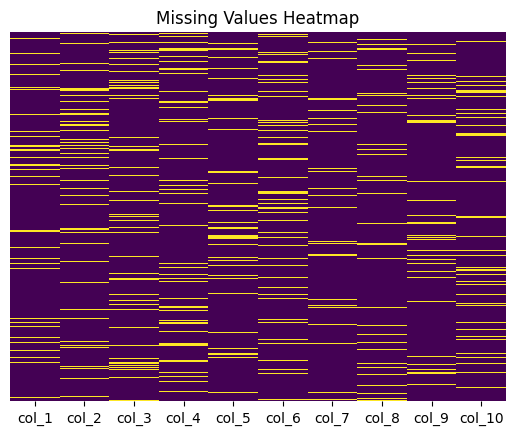

Best imputation method: Constant Imputation (e.g., -1) with variance deviation: 0.06123873294268535


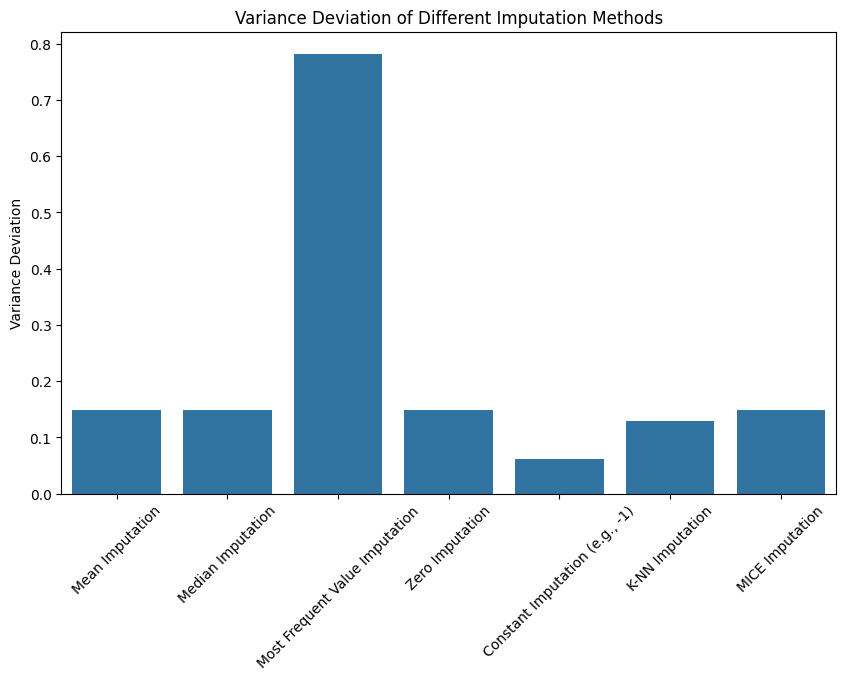

Best imputed data exported to 'best_imputed_data.csv'.


In [ ]:

# Example usage with incomplete_df
# incomplete_df should be the DataFrame with missing values
impute_and_evaluate(missing_df)